In [15]:
from IPython.display import Audio
import numpy as np
from scipy.io.wavfile import read
from scipy.io.wavfile import write
from matplotlib import pyplot as plt

def arr2sound(arr1, fs, filename="output.wav", volume=0.5):
    arr1 = arr1 * (32767 * volume / np.abs(arr1).max())
    write(filename, fs, arr1.astype(np.int16))

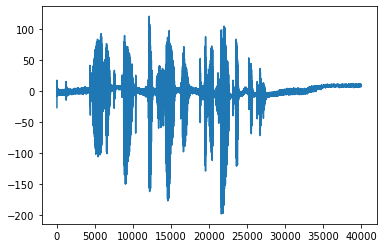

In [26]:
csvfilename="serialOut3.log"
a = np.loadtxt(csvfilename)
a_2=a-a.mean()
arr2sound(a_2, 8000, "output3.wav",1)
plt.plot(a_2)

In [21]:
Audio("output1.wav")

In [22]:
from google.cloud import speech
import io

In [27]:
# Instantiates a client
client = speech.SpeechClient()

# The name of the audio file to transcribe
# gcs_uri = "gs://cloud-samples-data/speech/brooklyn_bridge.raw"
speech_file = "./output3.wav"

with io.open(speech_file, "rb") as f:
    content = f.read()

audio = speech.RecognitionAudio(content=content)

config = speech.RecognitionConfig(
    sample_rate_hertz=8000,
    language_code="ja-JP",
    enable_automatic_punctuation=True
)

# Detects speech in the audio file
response = client.recognize(config=config, audio=audio)

for result in response.results:
    print("Transcript: {}".format(result.alternatives[0].transcript))

Transcript: 牛肉と白菜とかぼちゃを買ってくる。
